# Programación Big Data.

## Autor: Victor Simo Lozano

## Actividad 10
<p>Quantum computing.</p>
    

<hr style="border-color:red">

<div style="font-size:14px; text-align:justify"><b>PRIMERA PARTE.-</b><br></div>

Desarrollar ciruito cuantico con **Qiskit**

<div style="font-size:14px; text-align:justify"><b>1: </b>Importación de librería.</div>

In [1]:
# !pip install qiskit
# !pip install pylatexenc

In [2]:
import qiskit as qk

<div style="font-size:14px; text-align:justify"><b>2: </b>Version de qiskit empleada.</div>

In [3]:
qk.__qiskit_version__

{'qiskit-terra': '0.21.0', 'qiskit-aer': '0.10.4', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.19.2', 'qiskit': '0.37.0', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [4]:
for element, version in qk.__qiskit_version__.items():
    print(element, version)

qiskit-terra 0.21.0
qiskit-aer 0.10.4
qiskit-ignis None
qiskit-ibmq-provider 0.19.2
qiskit 0.37.0
qiskit-nature None
qiskit-finance None
qiskit-optimization None
qiskit-machine-learning None


In [5]:
for version in qk.__qiskit_version__.items():
    print(version)

('qiskit-terra', '0.21.0')
('qiskit-aer', '0.10.4')
('qiskit-ignis', None)
('qiskit-ibmq-provider', '0.19.2')
('qiskit', '0.37.0')
('qiskit-nature', None)
('qiskit-finance', None)
('qiskit-optimization', None)
('qiskit-machine-learning', None)


<div style="font-size:14px; text-align:justify"><b>3: </b>Crear un circuito ejemplo.</div>

In [6]:
# Registro cuantico de 2 qubits
qr = qk.QuantumRegister(2)
qr

QuantumRegister(2, 'q0')

In [7]:
# Registro clasico de 2 bits
cr = qk.ClassicalRegister(2)
cr

ClassicalRegister(2, 'c0')

In [8]:
# Contruccion del circuito
circuit = qk.QuantumCircuit(qr,cr)
circuit

<div style="font-size:14px; text-align:justify"><b>4: </b>Representar el circuito.</div>

In [9]:
%matplotlib inline

In [10]:
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

<div style="font-size:14px; text-align:justify"><b>5: </b>Puertas lógicas cuánticas.</div>

In [11]:
# Aplicar puerta de Hadamard al 1er qubit, obteniendo la superposicion al cambiar de valor el qubit
circuit.h(qr[0])

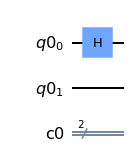

In [12]:
# Modelo del circuito impreso de forma diferente, más visual
circuit.draw(output='mpl')

In [13]:
# Añadir una Controled Gate.
# Qubit de control 0, target 1
circuit.cx(qr[0],qr[1])

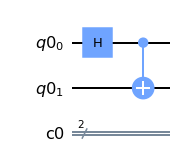

In [14]:
circuit.draw(output='mpl')

In [15]:
# Realizar las mediciones de circuito cuántico
# Para poder conculir un experimento cuántico, se necesita medir los bits para poder obtener la información del estado concreto.
circuit.measure(qr,cr)

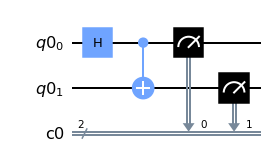

In [16]:
circuit.draw(output='mpl')

<div style="font-size:14px; text-align:justify"><b>6.1: </b>Ejecución del circuito en nuestra máquina.</div>

In [17]:
backed_simulator = qk.Aer.get_backend('qasm_simulator')
backed_simulator

QasmSimulator('qasm_simulator')

In [18]:
job_simulator = qk.execute(circuit,backend=backed_simulator)
job_simulator

In [19]:
result = job_simulator.result()
result

Result(backend_name='qasm_simulator', backend_version='0.10.4', qobj_id='6dcec826-f24f-46f7-bd7a-ba20416aea93', job_id='983a6f2f-7fbf-4c1e-94df-fb6d7127146a', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 519, '0x0': 505}), header=QobjExperimentHeader(clbit_labels=[['c0', 0], ['c0', 1]], creg_sizes=[['c0', 2]], global_phase=0.0, memory_slots=2, metadata={}, n_qubits=2, name='circuit-80', qreg_sizes=[['q0', 2]], qubit_labels=[['q0', 0], ['q0', 1]]), status=DONE, seed_simulator=3987715964, metadata={'parallel_state_update': 4, 'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': True, 'device': 'CPU', 'num_qubits': 2, 'parallel_shots': 1, 'remapped_qubits': False, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'num_clbits': 2, 'input_qubit_map': [[1, 1], [0, 0]], 'fusion': {'enabled': False}}, time_taken=0.003101953)], date=2022-07-14T17:56:23.139599, status=COMPLETED, header=QobjHead

In [20]:
result.status

'COMPLETED'

In [21]:
# Plotear histograma de resultado
from qiskit.tools.visualization import plot_histogram

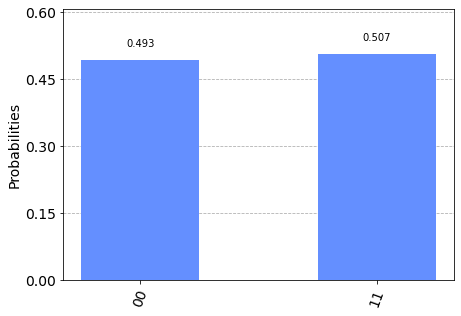

In [22]:
plot_histogram(result.get_counts(circuit))

<div style="font-size:14px; text-align:justify"><b>6.2: </b>Ejecución del circuito en maquina cuántica IBM.</div>

In [23]:
from qiskit import IBMQ

In [24]:
# Indicar nuestro token de IBM. Solo es necesario hacerlo la primra vez. Tras ejecutar todo y guardar,
# esta permanecera vinculada.
# IBMQ.save_account('')

In [25]:
IBMQ.load_account()

__init__.discover_credentials:INFO:2022-07-14 17:56:23,375: Using credentials from qiskitrc


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [26]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [27]:
provider = IBMQ.get_provider('ibm-q')
provider

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [28]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [29]:
# Elegir el backend
qcomp = provider.get_backend('ibmq_manila')
qcomp

<IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>

In [30]:
job = qk.execute(circuit, backend=qcomp)
job

In [31]:
from qiskit.tools.monitor import job_monitor

In [32]:
# Llevar a ejecutar a maquina cuántica fisica en IBM. Para ello existe una cola de computación.
job_monitor(job)

# 14 julio 19:23 -> Cola de 2

Job Status: job has successfully run


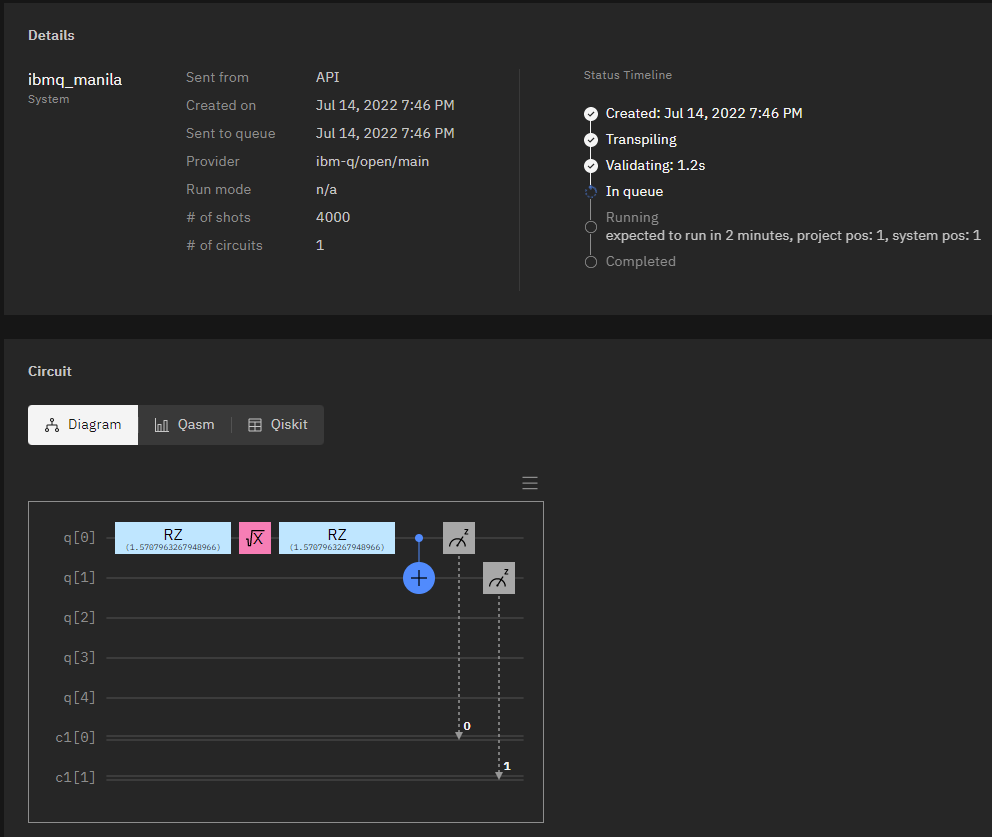

Ejemplo de una de las ejecuciones realizadas durante la practica

In [33]:
result = job.result()
result

Result(backend_name='ibmq_manila', backend_version='1.0.34', qobj_id='0e4eb965-0036-4f40-95de-8657c8a03a04', job_id='62d058cf1e8b8ebd0a92819b', success=True, results=[ExperimentResult(shots=4000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 1683, '0x1': 255, '0x2': 289, '0x3': 1773}), header=QobjExperimentHeader(clbit_labels=[['c0', 0], ['c0', 1]], creg_sizes=[['c0', 2]], global_phase=0.7853981633974483, memory_slots=2, metadata={}, n_qubits=5, name='circuit-80', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]))], date=2022-07-14 18:00:42+00:00, status=Successful completion, header=QobjHeader(backend_name='ibmq_manila', backend_version='1.0.34'), execution_id='dc821136-039e-11ed-8dd5-bc97e15b08d0', time_taken=6.457883358001709, error=None, client_version={'qiskit': '0.37.0'})

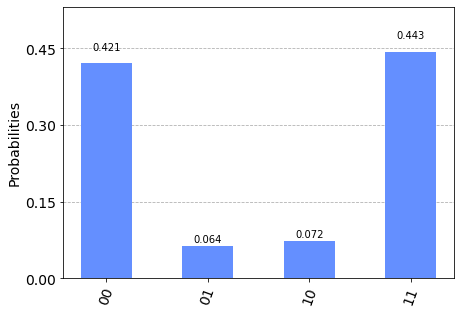

In [34]:
plot_histogram(result.get_counts(circuit))

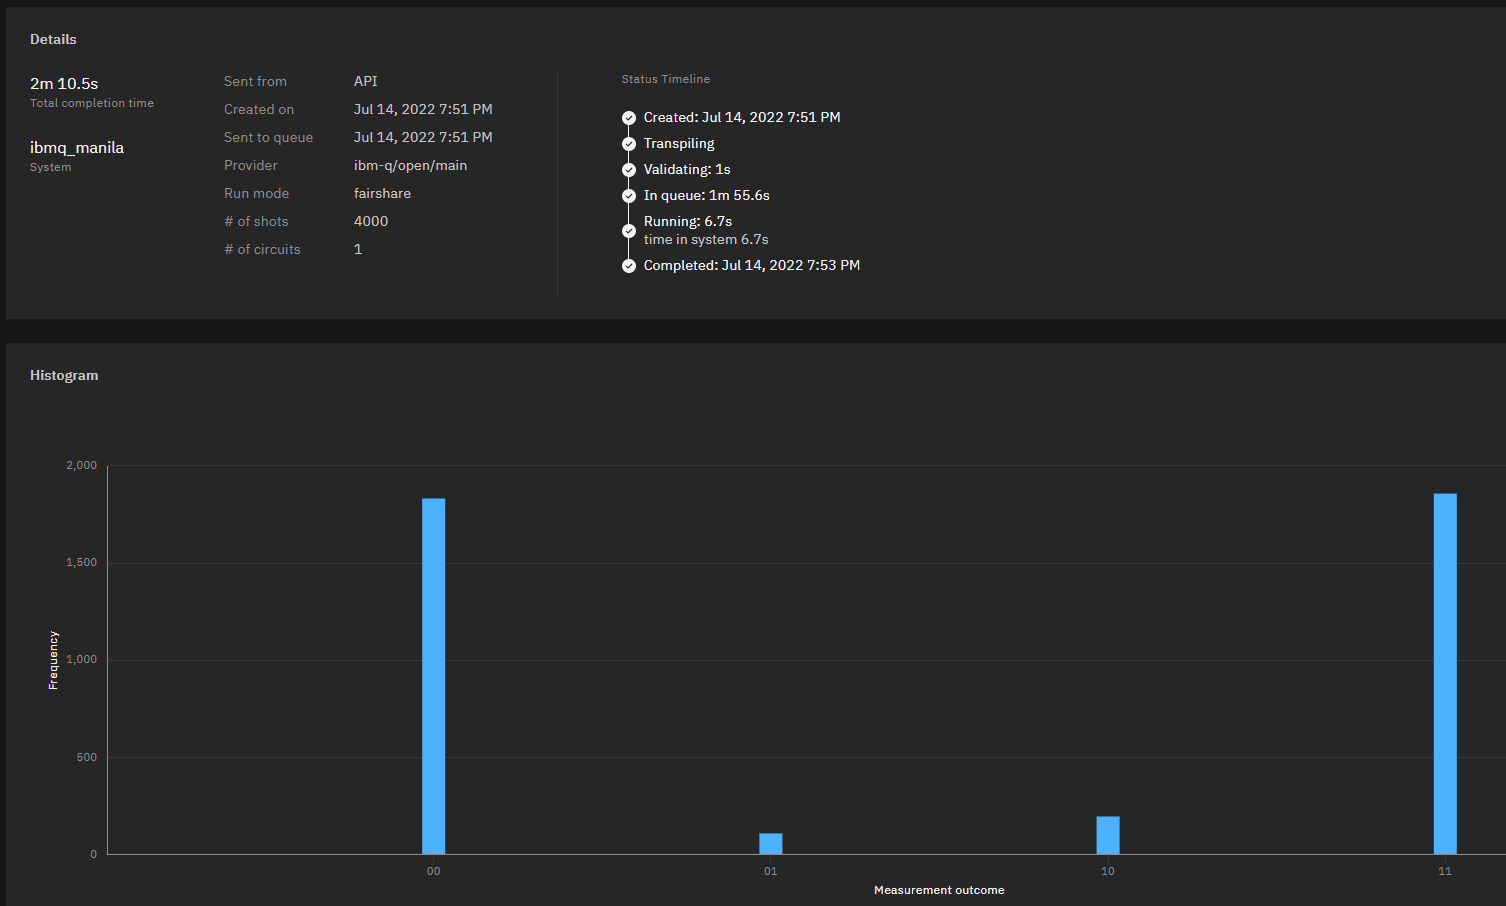

Resultado de una ejecución en Maquina Cuantica IBM